# Interactive Example

## 1. Run PhaseNet in terminal or use QuakeFlow API

Note: Please only use the QuakeFlow API for debugging and testing on small datasets. Do not run large jobs using the QuakeFlow API. The computational cost can be high for us.

```bash
uvicorn --app-dir=phasenet app:app --reload --port 8000
```

In [7]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
import obspy
import requests
sys.path.insert(0, os.path.abspath("../"))

In [8]:
# PHASENET_API_URL = "http://127.0.0.1:8000"
# PHASENET_API_URL = "http://phasenet.quakeflow.com" ## gcp
PHASENET_API_URL = "http://test.quakeflow.com:8001" ## local machine
# PHASENET_API_URL = "http://131.215.74.195:8001" ## local machine

## 2. Prepare seismic waveforms

Find more details in obspy's tutorials: 

[FDSN web service client for ObsPy](https://docs.obspy.org/packages/obspy.clients.fdsn.html#module-obspy.clients.fdsn)

[Mass Downloader for FDSN Compliant Web Services](https://docs.obspy.org/packages/autogen/obspy.clients.fdsn.mass_downloader.html#module-obspy.clients.fdsn.mass_downloader)



In [10]:
import obspy
stream = obspy.read()

TypeError: Unknown format for file d:\torunpha\.venv\lib\site-packages\obspy\core\data\BW_RJOB.xml

In [4]:
## Extract 3-component data
stream = stream.sort()
assert(len(stream) == 3)
data = []
for trace in stream:
    data.append(trace.data)
data = np.array(data).T
assert(data.shape[-1] == 3)

data_id = stream[0].get_id()[:-1]
timestamp = stream[0].stats.starttime.datetime.strftime("%Y-%m-%dT%H:%M:%S.%f")[:-3]

## 3. Predict P/S-phase picks using PhaseNet

In [9]:
req = {"id": [data_id],
       "timestamp": [timestamp],
       "vec": [data.tolist()]}
resp = requests.post(f'{PHASENET_API_URL}/predict', json=req)
PZ=np.zeros((24*24,2))

NameError: name 'data_id' is not defined

KeyboardInterrupt: 

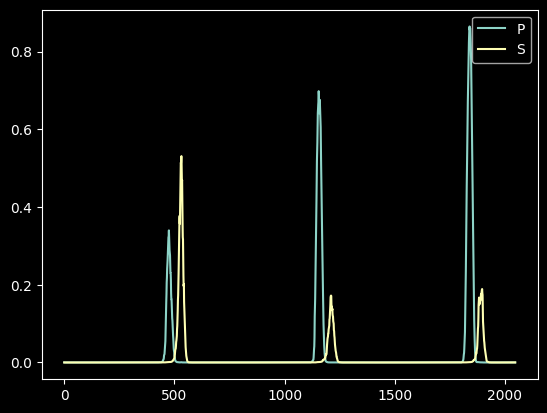

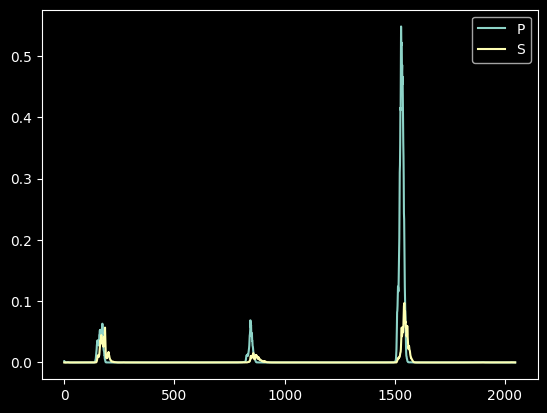

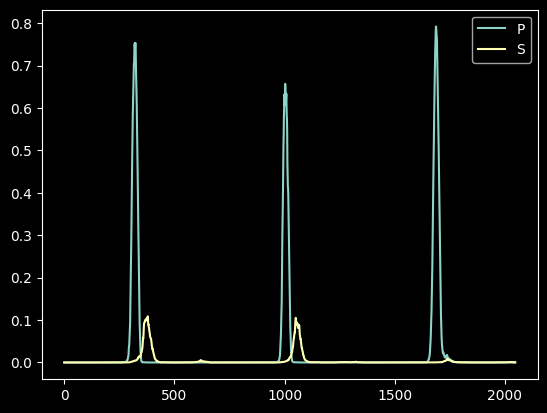

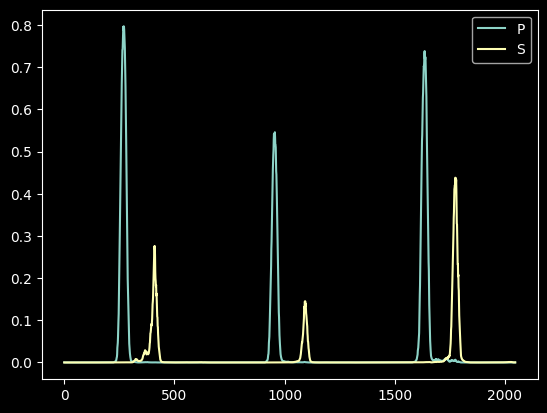

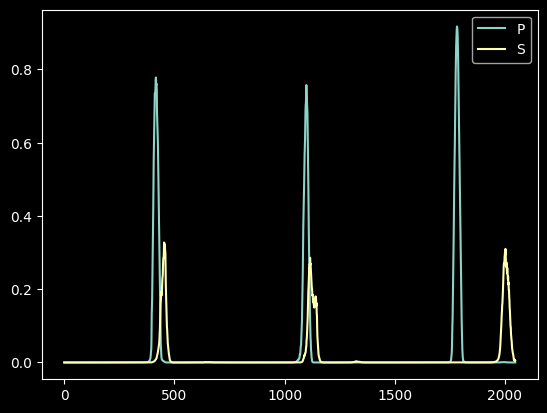

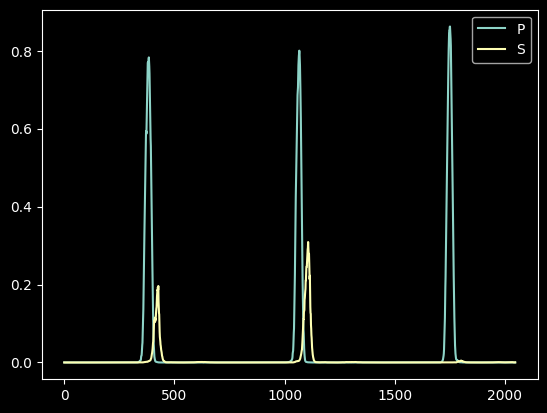

In [6]:
for path in os.listdir('data_1'):
   a,b=path[:-4].split("_")
   i=int(a)
   j=int(b)
   data=np.load('./data/'+path)
   data=data.reshape(-1,3)
   req = {"id": [data_id],
       "timestamp": [timestamp],
       "vec": [data.tolist()]}
   resp = requests.post(f'{PHASENET_API_URL}/predict_prob', json=req)
   picks,preds = resp.json() 
   preds = np.array(preds)
   PZ[24*(i-1)+j-1,0]=np.argmax(preds[0, :, 0, 1])
   PZ[24*(i-1)+j-1,1]=np.argmax(preds[0, :, 0, 2])
   plt.figure()
   plt.plot(preds[0, :, 0, 1], label="P")
   plt.plot(preds[0, :, 0, 2], label="S")
   plt.legend()
   plt.savefig('./figure/'+str(i)+'_'+str(j)+'.jpg')

In [ ]:
for path in os.listdir('data_2'):
   a,b=path[:-4].split("_")
   i=int(a)
   j=int(b)
   data=np.load('./data/'+path)
   data=data.reshape(-1,3)
   req = {"id": [data_id],
       "timestamp": [timestamp],
       "vec": [data.tolist()]}
   resp = requests.post(f'{PHASENET_API_URL}/predict_prob', json=req)
   picks,preds = resp.json() 
   preds = np.array(preds)
   PZ[24*(i-1)+j-1,0]=np.argmax(preds[0, :, 0, 1])
   PZ[24*(i-1)+j-1,1]=np.argmax(preds[0, :, 0, 2])
   plt.figure()
   plt.plot(preds[0, :, 0, 1], label="P")
   plt.plot(preds[0, :, 0, 2], label="S")
   plt.legend()
   plt.savefig('./figure/'+str(i)+'_'+str(j)+'.jpg')

In [ ]:
for path in os.listdir('data_3'):
   a,b=path[:-4].split("_")
   i=int(a)
   j=int(b)
   data=np.load('./data/'+path)
   data=data.reshape(-1,3)
   req = {"id": [data_id],
       "timestamp": [timestamp],
       "vec": [data.tolist()]}
   resp = requests.post(f'{PHASENET_API_URL}/predict_prob', json=req)
   picks,preds = resp.json() 
   preds = np.array(preds)
   PZ[24*(i-1)+j-1,0]=np.argmax(preds[0, :, 0, 1])
   PZ[24*(i-1)+j-1,1]=np.argmax(preds[0, :, 0, 2])
   plt.figure()
   plt.plot(preds[0, :, 0, 1], label="P")
   plt.plot(preds[0, :, 0, 2], label="S")
   plt.legend()
   plt.savefig('./figure/'+str(i)+'_'+str(j)+'.jpg')

In [ ]:
for i in range(0,24):
    np.savetxt('./PZ/PZ'+str(i)+'.csv',PZ[i,:,:],delimiter=',')


## 4. Get both picks and prediction (time series)